In [33]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [34]:
#AAA = 'Corp_Bond_AAA.csv'
#BBB = 'Corp_Bond_BBB.csv'
#B = 'Corp_Bond_B.csv'
# Bond Data
#Corp_Bond_AAA_df= pd.read_csv(AAA)
#Corp_Bond_BBB_df= pd.read_csv(BBB)
#Corp_Bond_B_df= pd.read_csv(B)
#shape of data
#print(Corp_Bond_AAA_df.shape)
#print(Corp_Bond_BBB_df)
#print(Corp_Bond_B_df)

In [35]:
Tsy = 'US_Yield_Curve.csv'
bond_yield_df = pd.read_csv(Tsy)
print(bond_yield_df.shape)

(7560, 13)


In [36]:
copper = 'Copper1MFutures.csv'
copper_df = pd.read_csv(copper)
print(copper_df.shape)


(15202, 9)


In [37]:
gold = 'Gold1MFutures.csv'
gold_df = pd.read_csv(gold)
print(copper_df.shape)


(15202, 9)


In [38]:
copp_gold_df = pd.merge(gold_df, copper_df, on=["Date"])
copp_gold_df.head()


,Date,Open_x,High_x,Low_x,Last_x,Change_x,Settle_x,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
0,3/20/2020,1483.5,1483.5,1483.5,1483.5,5.4,1484.0,14,275,2.1620,2.2410,2.1200,2.1680,0.0095,2.1905,194,1429
1,3/19/2020,1481.5,1491.6,1471.0,1476.0,1.3,1478.6,262,133,2.1615,2.1995,2.0595,2.1855,0.0395,2.2000,242,1613
2,3/18/2020,1537.5,1542.0,1484.6,1488.2,47.6,1477.3,333,84,2.3160,2.3225,2.1220,2.1555,0.1550,2.1605,205,1777
3,3/17/2020,1469.3,1537.7,1469.3,1525.5,39.0,1524.9,122,64,2.4170,2.4170,2.3090,2.3135,0.0830,2.3155,296,2068
4,3/16/2020,1569.1,1569.1,1452.1,1502.6,29.8,1485.9,193,51,2.4550,2.4600,2.3640,2.3800,0.0755,2.3985,516,2284


In [39]:
copp_gold_df = pd.DataFrame({
    "Date": copp_gold_df["Date"],
    "Gold Price": copp_gold_df["Settle_x"],
    "Copper Price": copp_gold_df["Settle_y"]
})
copp_gold_df

,Date,Gold Price,Copper Price
0,3/20/2020,1484.0,2.1905
1,3/19/2020,1478.6,2.2000
2,3/18/2020,1477.3,2.1605
3,3/17/2020,1524.9,2.3155
4,3/16/2020,1485.9,2.3985
...,...,...,...
11342,1/7/1975,173.4,0.5200
11343,1/6/1975,174.4,0.5130
11344,1/3/1975,174.7,0.5220
11345,1/2/1975,175.1,0.5210


In [40]:
gold_copp_ratio = (copp_gold_df["Copper Price"] / copp_gold_df["Gold Price"])

In [41]:
copp_gold_df.insert(3,"GoldCopperRatio", gold_copp_ratio)
copp_gold_df.head()                                       


,Date,Gold Price,Copper Price,GoldCopperRatio
0,3/20/2020,1484.0,2.1905,0.001476
1,3/19/2020,1478.6,2.2000,0.001488
2,3/18/2020,1477.3,2.1605,0.001462
3,3/17/2020,1524.9,2.3155,0.001518
4,3/16/2020,1485.9,2.3985,0.001614


In [42]:
copp_gold_df = copp_gold_df.sort_index(axis=0, ascending=False)
copp_gold_df.head()


,Date,Gold Price,Copper Price,GoldCopperRatio
11346,12/31/1974,183.9,0.524,0.002849
11345,1/2/1975,175.1,0.521,0.002975
11344,1/3/1975,174.7,0.522,0.002988
11343,1/6/1975,174.4,0.513,0.002942
11342,1/7/1975,173.4,0.520,0.002999


In [43]:
copp_gold_df["Date"] = pd.to_datetime(copp_gold_df["Date"])

In [46]:
copp_gold_years_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1980-12-31") & 
                                   (copp_gold_df["Date"] <= "2020-01-02")]

copp_gold_years_df

,Date,Gold Price,Copper Price,GoldCopperRatio
9841,1980-12-31,599.5,0.8375,0.001397
9840,1981-01-02,594.5,0.8535,0.001436
9839,1981-01-05,601.5,0.8830,0.001468
9838,1981-01-06,605.0,0.8730,0.001443
9837,1981-01-07,580.0,0.8595,0.001482
...,...,...,...,...
58,2019-12-26,1509.3,2.8645,0.001898
57,2019-12-27,1513.8,2.8365,0.001874
56,2019-12-30,1518.6,2.8275,0.001862
55,2019-12-31,1523.1,2.7940,0.001834


In [47]:
copp_gold_87_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1987-01-01") & 
                                   (copp_gold_df["Date"] <= "1987-10-31")]

copp_gold_87_df

,Date,Gold Price,Copper Price,GoldCopperRatio
8328,1987-01-02,404.0,0.6060,0.001500
8327,1987-01-05,405.0,0.6145,0.001517
8326,1987-01-06,402.2,0.6125,0.001523
8325,1987-01-07,404.3,0.6115,0.001512
8324,1987-01-08,403.9,0.6110,0.001513
...,...,...,...,...
8122,1987-10-26,476.2,0.7895,0.001658
8121,1987-10-27,475.7,0.8025,0.001687
8120,1987-10-28,477.5,0.8100,0.001696
8119,1987-10-29,468.7,0.7965,0.001699


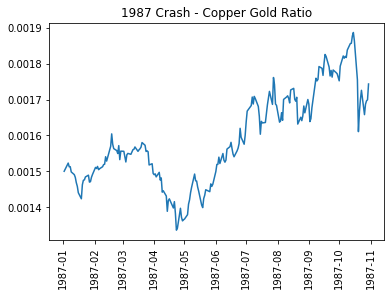

In [97]:
plt.plot(copp_gold_87_df['Date'],copp_gold_87_df['GoldCopperRatio'])
plt.title("1987 Crash - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [55]:
copp_gold_ltcm_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1997-10-01") & 
                                   (copp_gold_df["Date"] <= "1998-10-31")]

copp_gold_ltcm_df

,Date,Gold Price,Copper Price,GoldCopperRatio
5623,1997-10-01,333.6,0.9530,0.002857
5622,1997-10-02,331.0,0.9255,0.002796
5621,1997-10-03,334.6,0.9270,0.002770
5620,1997-10-06,332.3,0.9335,0.002809
5619,1997-10-07,331.0,0.9370,0.002831
...,...,...,...,...
5355,1998-10-26,292.2,0.7165,0.002452
5354,1998-10-27,293.5,0.7100,0.002419
5353,1998-10-28,293.2,0.7040,0.002401
5352,1998-10-29,294.8,0.7115,0.002414


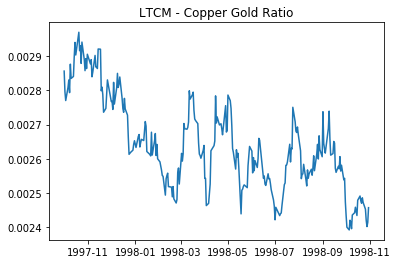

In [98]:
plt.plot(copp_gold_ltcm_df['Date'],copp_gold_ltcm_df['GoldCopperRatio'])
plt.title("LTCM - Copper Gold Ratio")
plt.show()

In [57]:
copp_gold_tech_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "1999-01-02") & 
                                   (copp_gold_df["Date"] <= "2000-09-30")]

copp_gold_tech_df

,Date,Gold Price,Copper Price,GoldCopperRatio
5309,1999-01-04,288.3,0.6445,0.002236
5308,1999-01-05,287.8,0.6390,0.002220
5307,1999-01-06,288.5,0.6455,0.002237
5306,1999-01-07,292.4,0.6455,0.002208
5305,1999-01-08,292.0,0.6530,0.002236
...,...,...,...,...
4877,2000-09-25,274.4,0.9270,0.003378
4876,2000-09-26,274.2,0.9165,0.003342
4875,2000-09-27,278.4,0.9125,0.003278
4874,2000-09-28,275.6,0.9110,0.003306


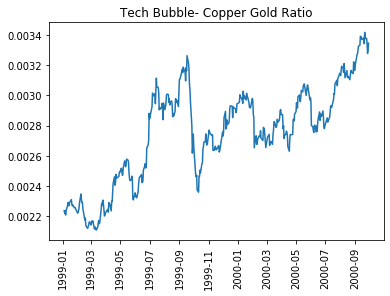

In [99]:
plt.plot(copp_gold_tech_df['Date'],copp_gold_tech_df['GoldCopperRatio'])
plt.title("Tech Bubble- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [60]:
copp_gold_911_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2000-01-02") & 
                                   (copp_gold_df["Date"] <= "2001-10-31")]

copp_gold_911_df

,Date,Gold Price,Copper Price,GoldCopperRatio
5059,2000-01-04,283.7,0.8380,0.002954
5058,2000-01-05,282.1,0.8475,0.003004
5057,2000-01-06,282.4,0.8450,0.002992
5056,2000-01-07,282.9,0.8455,0.002989
5055,2000-01-10,282.7,0.8395,0.002970
...,...,...,...,...
4606,2001-10-25,277.8,0.6210,0.002235
4605,2001-10-26,277.9,0.6305,0.002269
4604,2001-10-29,279.1,0.6285,0.002252
4603,2001-10-30,281.2,0.6340,0.002255


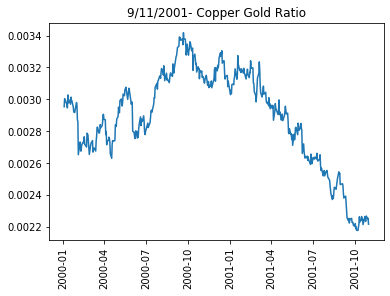

In [100]:
plt.plot(copp_gold_911_df['Date'],copp_gold_911_df['GoldCopperRatio'])
plt.title("9/11/2001- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [63]:
copp_gold_FC_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2007-01-02") & 
                                   (copp_gold_df["Date"] <= "2008-12-31")]

copp_gold_FC_df

,Date,Gold Price,Copper Price,GoldCopperRatio
3314,2007-01-03,629.8,2.6325,0.004180
3313,2007-01-04,626.2,2.5885,0.004134
3312,2007-01-05,606.9,2.5225,0.004156
3311,2007-01-08,609.4,2.5145,0.004126
3310,2007-01-09,615.0,2.5420,0.004133
...,...,...,...,...
2816,2008-12-24,847.1,1.2475,0.001473
2815,2008-12-26,870.4,1.2745,0.001464
2814,2008-12-29,874.6,1.2970,0.001483
2813,2008-12-30,870.0,1.3070,0.001502


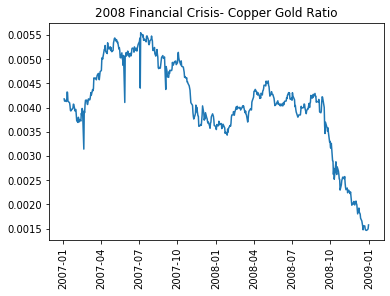

In [101]:
plt.plot(copp_gold_FC_df['Date'],copp_gold_FC_df['GoldCopperRatio'])
plt.title("2008 Financial Crisis- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [65]:
copp_gold_flash_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2010-02-01") & 
                                   (copp_gold_df["Date"] <= "2010-06-30")]

copp_gold_flash_df

,Date,Gold Price,Copper Price,GoldCopperRatio
2543,2010-02-01,1104.3,3.0785,0.002788
2542,2010-02-02,1117.4,3.0850,0.002761
2541,2010-02-03,1111.4,2.9680,0.002671
2540,2010-02-04,1062.4,2.8755,0.002707
2539,2010-02-05,1052.2,2.8540,0.002712
...,...,...,...,...
2444,2010-06-24,1245.5,3.0030,0.002411
2443,2010-06-25,1255.8,3.0930,0.002463
2442,2010-06-28,1238.2,3.0685,0.002478
2441,2010-06-29,1242.4,2.9155,0.002347


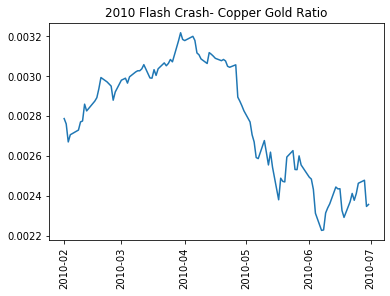

In [102]:
plt.plot(copp_gold_flash_df['Date'],copp_gold_flash_df['GoldCopperRatio'])
plt.title("2010 Flash Crash- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [73]:
copp_gold_debt_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2011-09-01") & 
                                   (copp_gold_df["Date"] <= "2012-06-30")]

copp_gold_debt_df

,Date,Gold Price,Copper Price,GoldCopperRatio
2147,2011-09-01,1826.7,4.1425,0.002268
2146,2011-09-02,1874.4,4.1070,0.002191
2145,2011-09-06,1870.6,4.0395,0.002159
2144,2011-09-07,1814.9,4.1155,0.002268
2143,2011-09-08,1855.2,4.1280,0.002225
...,...,...,...,...
1944,2012-06-25,1587.5,3.3140,0.002088
1943,2012-06-26,1574.0,3.3155,0.002106
1942,2012-06-27,1577.5,3.3465,0.002121
1941,2012-06-28,1550.4,3.3260,0.002145


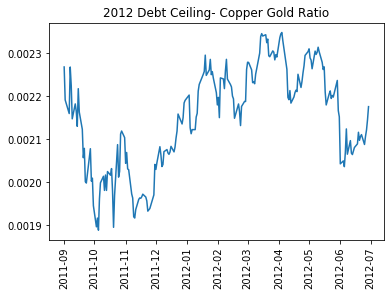

In [103]:
plt.plot(copp_gold_debt_df['Date'],copp_gold_debt_df['GoldCopperRatio'])
plt.title("2012 Debt Ceiling- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [75]:
copp_gold_china_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2015-01-02") & 
                                   (copp_gold_df["Date"] <= "2016-03-01")]

copp_gold_china_df

,Date,Gold Price,Copper Price,GoldCopperRatio
1311,2015-01-02,1186.2,2.8385,0.002393
1310,2015-01-05,1204.0,2.7930,0.002320
1309,2015-01-06,1219.4,2.8040,0.002299
1308,2015-01-07,1210.7,2.7960,0.002309
1307,2015-01-08,1208.5,2.8070,0.002323
...,...,...,...,...
1025,2016-02-24,1238.7,2.0950,0.001691
1024,2016-02-25,1238.2,2.0650,0.001668
1023,2016-02-26,1219.8,2.1180,0.001736
1022,2016-02-29,1233.9,2.1285,0.001725


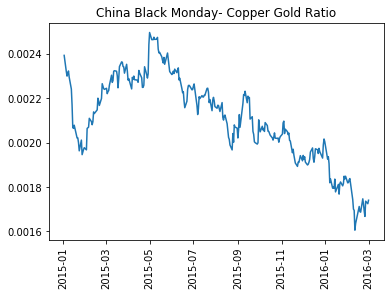

In [104]:
plt.plot(copp_gold_china_df['Date'],copp_gold_china_df['GoldCopperRatio'])
plt.title("China Black Monday- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [77]:
copp_gold_2018_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2017-01-02") & 
                                   (copp_gold_df["Date"] <= "2018-07-31")]

copp_gold_2018_df

,Date,Gold Price,Copper Price,GoldCopperRatio
808,2017-01-03,1162.0,2.4810,0.002135
807,2017-01-04,1165.3,2.5480,0.002187
806,2017-01-05,1181.3,2.5295,0.002141
805,2017-01-06,1173.4,2.5380,0.002163
804,2017-01-09,1184.9,2.5300,0.002135
...,...,...,...,...
417,2018-07-25,1231.8,2.8060,0.002278
416,2018-07-26,1225.7,2.8040,0.002288
415,2018-07-27,1223.0,2.7875,0.002279
414,2018-07-30,1221.3,2.7790,0.002275


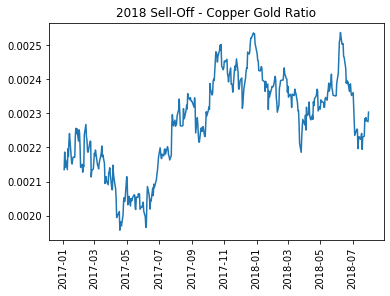

In [105]:
plt.plot(copp_gold_2018_df['Date'],copp_gold_2018_df['GoldCopperRatio'])
plt.title("2018 Sell-Off - Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()

In [80]:
copp_gold_covid_df = copp_gold_df.loc[(copp_gold_df["Date"] >= "2019-01-02") & 
                                   (copp_gold_df["Date"] <= "2020-03-17")]

copp_gold_covid_df

,Date,Gold Price,Copper Price,GoldCopperRatio
306,2019-01-02,1284.1,2.6250,0.002044
305,2019-01-03,1294.8,2.5705,0.001985
304,2019-01-04,1285.8,2.6515,0.002062
303,2019-01-07,1289.9,2.6410,0.002047
302,2019-01-08,1285.9,2.6605,0.002069
...,...,...,...,...
7,2020-03-11,1641.4,2.5120,0.001530
6,2020-03-12,1589.3,2.4810,0.001561
5,2020-03-13,1515.7,2.4740,0.001632
4,2020-03-16,1485.9,2.3985,0.001614


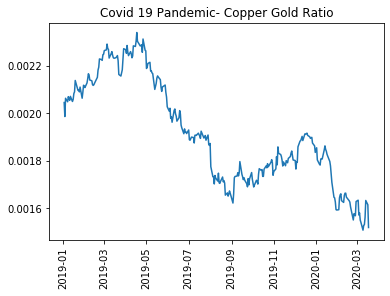

In [106]:
plt.plot(copp_gold_covid_df['Date'],copp_gold_covid_df['GoldCopperRatio'])
plt.title("Covid 19 Pandemic- Copper Gold Ratio")
plt.xticks(rotation = 90)
plt.show()